<h2>Clustering Analysis - K-Means clustering</h2>

<h3>Outline</h3>
<ul>
<li>Introduction</li>
<li>K-Means - Concept</li>
<li>K-Means - Implementation</li>
<li>K-Means - Optimal k estimation</li>
<li>Pros and Cons</li>
</ul>

<h2>1. Introduction</h2><br/>
Clustering is an unsupervised learning method that aims to group data points based on proximity of feature values.

<table>
    <tr>
        <td><img src="Media/clustering_data_1.png" width="350px"></td>
        <td><img src="Media/clustering_data_2.png" width="350px"></td>
    </tr>
</table>

Several clustering techniques have been proposed in the literature: 
<ul>
    <li>K-Means</li>
    <li>Hierarchical Clustering</li>
    <li>Density-based Clustering</li>
    <li>Gaussian Mixture Models</li>
    <li>Fuzzy c-mean</li>
    <li>etc.</li>
</ul>


<h2>2. K-Means clustering</h2>
<h3>2.1. Concept and Formulation</h3><br/>
K-Means is a popular clustering method that aims to group data into k-groups given an apriori number of clusters.<br/><br/>
The mission of K-Means: <b>"Give me k clusters that best fit the data"</b>.

<b style="color:blue">It proceeds by finding k-centroids around which data points orbit:</b> <i> "Find k-centroids and group the data points around their nearest centroid forming k-clusters"</i>. A quality function is thus formulated to estimate the location of these centroids.<br/><br/> 

The Within Cluster Sum of Squares (WCSS) measures the variance of datapoints around each centroid within each cluster:<br/>
Let $c_1,c_2,....,c_k$ be k centroids, $c_i$ are coordinate locations: $c_i=[f_1,f_2,....f_n]$, WCSS is defined as: 

$$
 WCSS = J(c_1,c_2,...,c_k) = \sum_{i=1}^{k}\sum_{x_j\in C_i}^{}(x_j-c_i)^2
$$

<img width="400px" src="Media/clustering_k.png"/>

The location of the k-centroid is most typically found using the <b>Llyod's algorithm</b>

<ol>
    <li>Choose the value of k: Determine how many clusters you are aiming to find</li>
    <li>Choose initial guesses of the k centroids: $c_1 = [0.1, 0.5, ...]$, $c_2 = [0.3, 0.5, ...]$,....$c_k = [0.9, 0.5, ...]$</li>
    <li>Compute the distance from each data point to each centroid. <b>Assign each point to the closest centroid $c_j$</b> forming k-clusters: <br/><br/>
     $$ 
     d(p,c) = \sqrt{\sum_{j=1}^{n}(p_{ij}-c_j)^2}: \text{Euclidean distance is used typically}
     $$
    </li>
    <li>Compute the centroid, of each newly defined clusters from Step 2:<br/><br/>
        $$
        (c_1,c_2,..c_n) = (\frac{\sum_{i=1}^{m}p_{i1}}{m},\frac{\sum_{i=1}^{m}p_{i2}}{m},...\frac{\sum_{i=1}^{m}p_{in}}{m})
        $$    
    </li>
    <li>Assign each point to the closest centroid computer in Step 3</li>
    <li>Compute the centroid of the newly defined clusters</li>
    <li>Repeat until the algorithm converges: <i>"Centroids location do not significantly varies anymore"</i></li>
 
     
</ol>

<h3>Illustration</h3>
<table>
    <tr>
        <td>
    <figure>
        <figcaption> Step 1</figcaption>
        <img src="Media/step1_k.png" width="200px">        
    </figure>
        </td>
        <td>
    <figure>
        <figcaption> Step 2</figcaption>
        <img src="Media/step2_k.png" width="200px">        
    </figure>
        </td>
        <td>
    <figure>
        <figcaption> Step 3</figcaption>
        <img src="Media/step3_k.png" width="200px">        
    </figure>
        </td>
    </tr>
<table>

<h3>2.2. Implementation - Case Study: 2D Clustering</h3>

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore') #ignore warnings
#load the dataset
df = pd.read_csv('datasets/OLART_customers.csv')
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


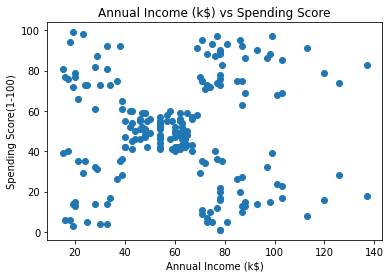

In [20]:
#select data of interest
sub_df = df.iloc[:,[3,4]] #Annual Income against Spending Score
x_1 = sub_df['Annual Income (k$)']
x_2 = sub_df['Spending Score (1-100)']

#plotting the data of interest
plt.figure()
plt.scatter(x_1,x_2)
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score(1-100)')
plt.title('Annual Income (k$) vs Spending Score')
plt.show()

<b style="color:red"> In case of an error -> Install</b><br/>
pip install --upgrade scikit-learn<br/>
pip install threadpoolctl==3.1.0

In [27]:
#Perform K-Means clustering
from sklearn.cluster import KMeans
k_choice = 3 #choice of k
km = KMeans(k_choice)
clusterIds = km.fit_predict(sub_df) #get data group labels

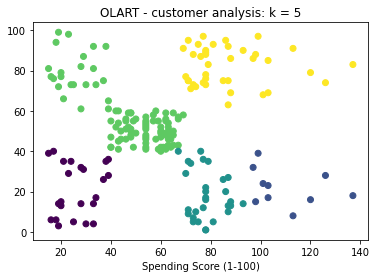

In [26]:
plt.figure()
plt.xlabel(sub_df.columns[0])
plt.xlabel(sub_df.columns[1])
plt.scatter(x_1,x_2,c=clusterIds)
plt.title('OLART - customer analysis: k = %d'%k_choice)
plt.show() 

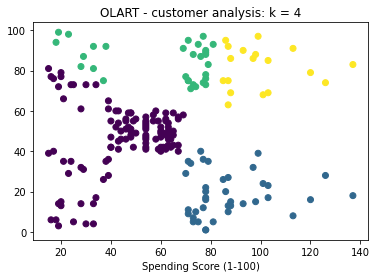

In [12]:
k_choice = 4 #choice of k
km = KMeans(k_choice)
clusterIds = km.fit_predict(sub_df) #get data group labels
plt.figure()
plt.xlabel(sub_df.columns[0])
plt.xlabel(sub_df.columns[1])
plt.scatter(x_1,x_2,c=clusterIds)
plt.title('OLART - customer analysis: k = %d'%k_choice)
plt.show() 

<h3>2.3. Finding the Optimal k value</h3><br/>
It is now obvious that k-Means clustering requires an apriori knownledge of the inherent number of clusters, which is not generally evident. How do we then find the optimal k value?<br/>

Several estimation methods have been proposed in the literature:<br/>
<ul>
    <li style="color:blue">The elbow method</li>
    <li style="color:blue">The CH index</li>
    <li style="color:blue">The silhouette method</li>
    <li>The canopy method</li>
    <li>Information Criterion Approach</li>
    <li>etc.</li>
</ul>

<h4>2.3.1. The Elbow method</h4><br/>

The Elbow method is a graphical approach for k estimation that consists of computing the WCSS for a wide range of k-groups, and <b style="color:blue">selecting the k-value where the sharpest bend occurs</b>. The rationale is to select the k-value after which there is no drastic reduction in WCSS.



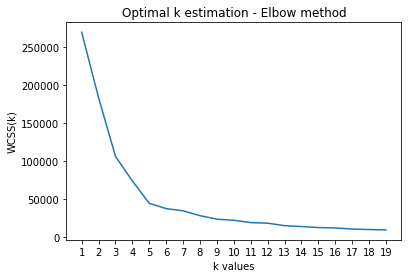

In [28]:
import numpy as np

wcss = []
for k in range(1,20): #set range k values to search from
    km = KMeans(k)
    km.fit(sub_df)
    wcss_iter = km.inertia_ #store the WCSS per the current k
    wcss.append(wcss_iter)

plt.figure()
plt.plot(np.arange(1,20),wcss)
plt.xticks(range(1,20))
plt.xlabel('k values')
plt.ylabel('WCSS(k)')
plt.title('Optimal k estimation - Elbow method')
plt.show()

<b>What is the k-value leading to a sharpest bend? </b>

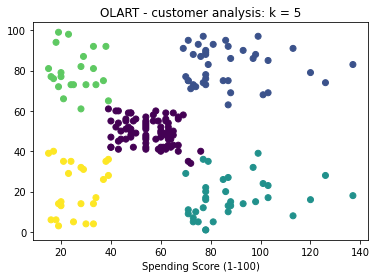

In [29]:
k_optimal = 5  #sharpest bend at k=5
km = KMeans(k_optimal)
clusterIds = km.fit_predict(sub_df) #get data group labels

plt.figure()
plt.xlabel(sub_df.columns[0])
plt.xlabel(sub_df.columns[1])
plt.scatter(x_1,x_2,c=clusterIds)
plt.title('OLART - customer analysis: k = %d'%k_optimal)
plt.show()

<h4>2.3.2. The CH-index method</h4><br/>

 The Calinski-Harabasz Index or Variance ratio criterion is a measure that compares how similar an obect is to its own cluster (cohesion) compared to other clusters (separation). CH index has a form of Seperation/Cohesion.
 
 <b style="color:blue">"Good clustering implies far apart clusters, with compact data groups"</b>
 
 
 Seperation measure: <b>Between-cluster variation</b><br/>
 $$
  BCSS = \sum_{k=1}^{K}n_k(c_k-\bar{x})
 $$
 
 $$
  CH_{index} = \frac{BCSS/(K-1)}{WCSS/(n-1)}
 $$

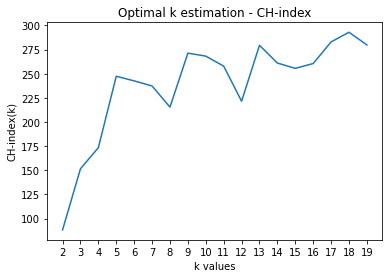

In [30]:
from sklearn import metrics

ch_index = []
for k in range(2,20): #set range k values to search from
    km = KMeans(k)
    km.fit(sub_df)
    labels = km.labels_
    ch_i = metrics.calinski_harabasz_score(sub_df, labels)
    ch_index.append(ch_i)

plt.figure()
plt.plot(np.arange(2,20),ch_index)
plt.xticks(range(2,20))
plt.xlabel('k values')
plt.ylabel('CH-index(k)')
plt.title('Optimal k estimation - CH-index')
plt.show()

The best k is obtained by investigating each peak.

<h3>2.4 Pros and Cons of K-Means </h3><br/>

<b>Pros</b>
<ul>
    <li>Computational efficient clustering technique</li>
    <li>Suitable for large datasets</li>
    <li>Easy to implement and interpret</li>
    <li>Easily adaptable to new dataset</li>
</ul>

<b>Cons</b>
<ul>
    <li>Lacks consistency</li>
    <li>Dependent on initial values</li>
    <li>Sensitive to scaling</li>
    <li>Most Appropriate to spherical data points</li>
</ul>